In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas

In [3]:
data = pd.read_csv('testconcat2.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes       Close                                                  \
Symbol             BDX          GL         IBM         NSC         PEP   
1985-03-29    1.795661    3.218201   13.260287    2.722784    1.298723   
1985-06-28    1.982841    3.560370   13.035309    2.923915    1.440168   
1985-09-30    2.016257    1.405653   13.160484    2.943589    1.445103   
1985-12-31    2.274995    1.627597   16.657703    3.553781    1.767078   
1986-03-31    3.178797    2.459892   16.345213    4.341940    2.094551   
...                ...         ...         ...         ...         ...   
2019-12-31  268.344421  104.062096  125.681244  189.680557  132.799957   
2020-03-31  227.458496   71.274857  105.098518  143.283661  117.487144   
2020-06-30  237.638626   73.722969  115.955757  173.271912  130.386841   
2020-09-30  231.876114   79.559692  118.349457  212.222305  137.619598   
2020-12-30  246.679993   93.030212  122.700371  235.031281  147.309998   

Attributes   CloseNext                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-29    1.982841   3.560370   13.035309    2.923915    1.440168   
1985-06-28    2.016257   1.405653   13.160484    2.943589    1.445103   
1985-09-30    2.274995   1.627597   16.657703    3.553781    1.767078   
1985-12-31    3.178797   2.459892   16.345213    4.341940    2.094551   
1986-03-31    4.076053   2.755817   15.921562    3.925636    2.484556   
...                ...        ...         ...         ...         ...   
2019-12-31  227.458496  71.274857  105.098518  143.283661  117.487144   
2020-03-31  237.638626  73.722969  115.955757  173.271912  130.386841   
2020-06-30  231.876114  79.559692  118.349457  212.222305  137.619598   
2020-09-30  246.679993  93.030212  122.700371  235.031281  147.309998   
2020-12-30         NaN        NaN         NaN         NaN         NaN   

Attributes        High                                                  \
Symbol             BDX          GL         IBM         NSC         PEP   
1985-03-29    1.795661    3.218201   13.273339    2.738584    1.313582   
1985-06-28    1.982841    3.615857   13.114311    2.923915    1.443162   
1985-09-30    2.020819    1.433396   13.200324    2.959792    1.445103   
1985-12-31    2.320862    1.655340   17.005855    3.553781    1.767078   
1986-03-31    3.224867    2.496882   16.520533    4.386133    2.125083   
...                ...         ...         ...         ...         ...   
2019-12-31  268.383897  104.467472  125.756257  189.963904  133.373247   
2020-03-31  228.725618   74.057713  107.827117  147.101287  122.965311   
2020-06-30  239.178061   74.249348  116.368616  174.614096  130.938922   
2020-09-30  234.756144   80.306498  119.555621  217.190914  138.205421   
2020-12-30  249.339996   93.658994  123.203648  235.987428  147.990005   

Attributes         Low                                                  \
Symbol             BDX          GL         IBM         NSC         PEP   
1985-03-29    1.746032    3.181210   13.116721    2.712251    1.295751   
1985-06-28    1.960154    3.495636   13.008975    2.886566    1.425198   
1985-09-30    2.007134    1.350167   13.067524    2.938188    1.430018   
1985-12-31    2.274995    1.590606   16.604142    3.520976    1.751897   
1986-03-31    3.114300    2.450643   16.142921    4.308796    2.088444   
...                ...         ...         ...         ...         ...   
2019-12-31  265.157469  103.725937  124.143515  188.508049  132.178081   
2020-03-31  216.796839   70.601424  104.378469  142.027477  116.929545   
2020-06-30  229.484596   71.686969  114.256318  169.649936  128.996822   
2020-09-30  226.016439   78.773056  117.503205  211.091723  135.931611   
2020-12-30  246.589996   92.471295  121.999734  233.059245  147.009995   

Attributes        Open                                                  ...  \
Symbol             BDX          GL         IBM         NSC         PEP  ...   
198

In [4]:
#Cuál es el número de registros?
#Cuál es el número de atributos?
shape = data.shape
shape

(144, 80)

In [8]:
stocks_list = data.xs('Close', level=0, axis=1).columns
for i in stocks_list:
    print("stock",i)
    # Cual es el máximo de datos faltantes en un mismo registro?
    print(max(data.xs(i, level=1, axis=1).isnull().sum(axis=1)))
    #Cuantos datos faltantes hay por cada atributo?
    print(data.xs(i, level=1, axis=1).isnull().sum())

stock BDX
0
Attributes
Close        0
CloseNext    0
High         0
Low          0
Open         0
Volume       0
bop          0
ema20        0
ema200       0
lower        0
ma20         0
macd         0
momentum     0
signal       0
std20d       0
upper        0
dtype: int64
stock GL
0
Attributes
Close        0
CloseNext    0
High         0
Low          0
Open         0
Volume       0
bop          0
ema20        0
ema200       0
lower        0
ma20         0
macd         0
momentum     0
signal       0
std20d       0
upper        0
dtype: int64
stock IBM
0
Attributes
Close        0
CloseNext    0
High         0
Low          0
Open         0
Volume       0
bop          0
ema20        0
ema200       0
lower        0
ma20         0
macd         0
momentum     0
signal       0
std20d       0
upper        0
dtype: int64
stock NSC
0
Attributes
Close        0
CloseNext    0
High         0
Low          0
Open         0
Volume       0
bop          0
ema20        0
ema200       0
lower        0


## limpieza

En el primer box realizo una limpieza teniendo todas las acciones para que sea mas facil, ya que estas fechas en todas las acciones estan vacias por lo tanto se eliminan.

En el segundo box se borran estas acciones las cuales tienen muchos datos vacios

En el tercer box se hace uso de ffill 'forward fill' and will propagate last valid observation forward. inplace : If True, fill in place.

In [6]:
#se borran estas fechas las cuales estan vacias en todas las acciones
date_drops = ['2020-12-30']
data.drop(date_drops, axis=0, errors='ignore', inplace=True)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)

In [7]:
#borrar desde 1980
data.drop(data.index[:data.index.get_loc('1989-12-29')], axis=0, inplace=True)

In [10]:
#se borran estos datos debido a la alta correlacion
attributes_to_erase = ('High','Low','Open','ma20','lower','upper')
for i in attributes_to_erase:
    data=data.drop(i, axis=1, level=0)

## algunos analisis individuales

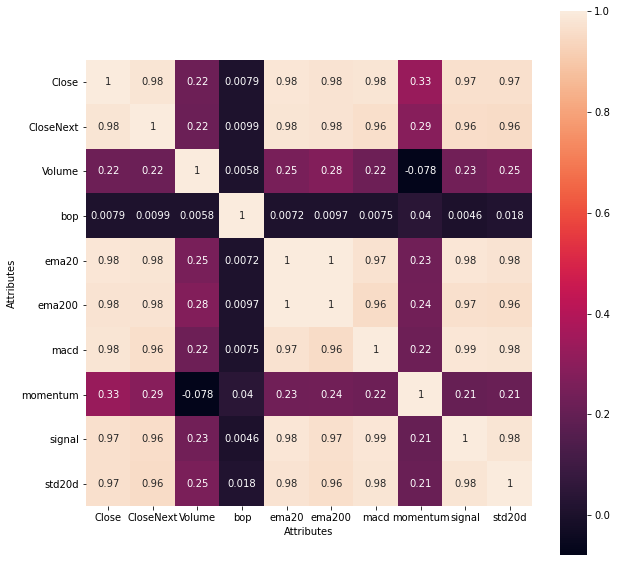

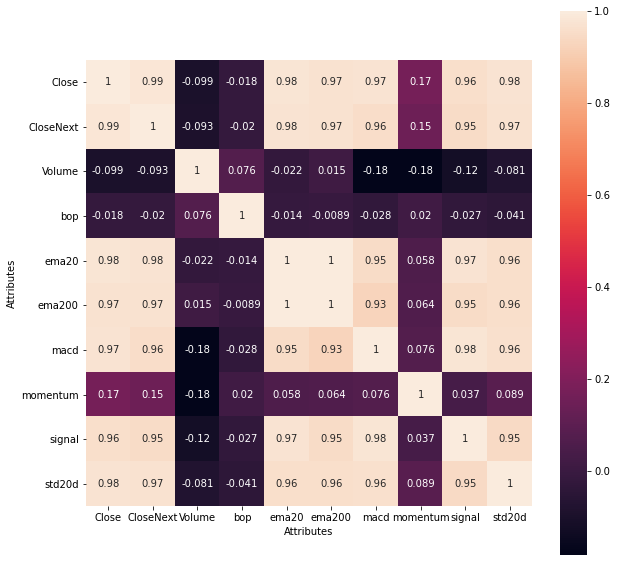

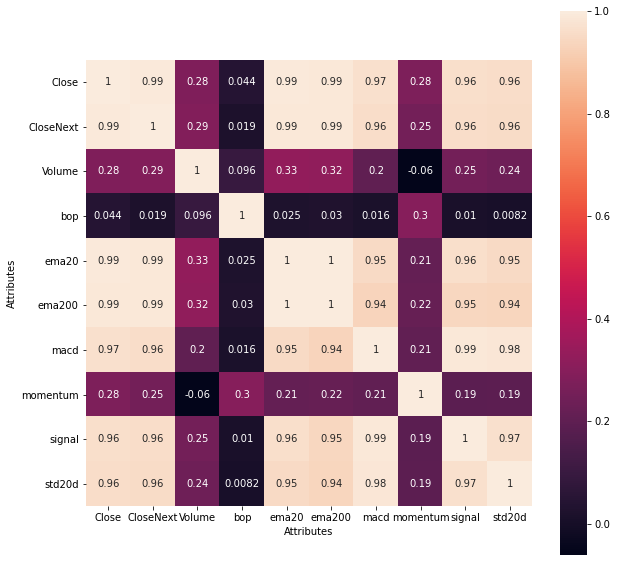

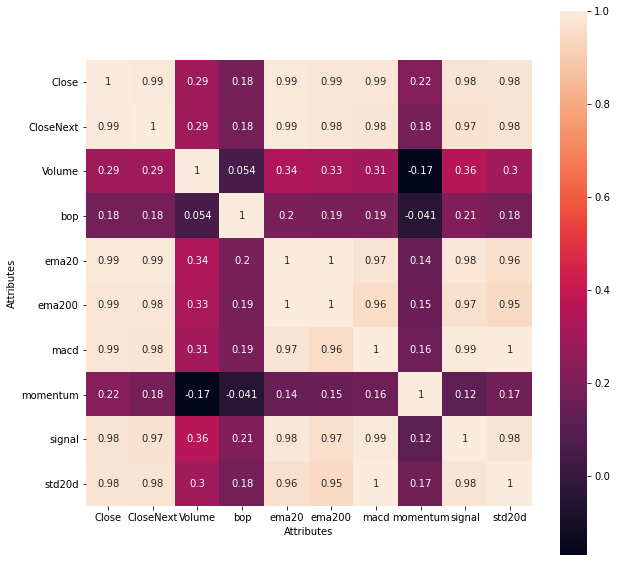

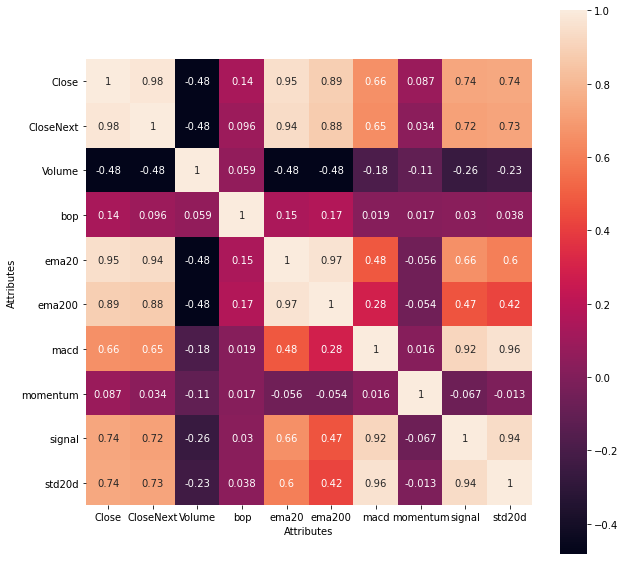

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('NSC', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('GL', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('PEP', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('BDX', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('IBM', level=1, axis=1).corr(), square=True, annot=True, ax=ax)

## Sacamos el dataframe de la accion NSC

In [14]:
dataNSC = data.xs('NSC', level=1, axis=1)
dataNSC

Attributes,Close,CloseNext,Volume,bop,ema20,ema200,macd,momentum,signal,std20d
1989-12-29,6.269426,6.194657,490800.0,0.200002,4.419276,3.006129,0.675846,0.426260,0.488766,0.923914
1990-03-30,6.194657,6.766847,573300.0,0.333328,4.588360,3.037856,0.732078,-0.074769,0.537429,0.949541
1990-06-29,6.766847,5.832855,890100.0,-1.000000,4.795835,3.074960,0.813437,0.572189,0.592630,1.018433
1990-09-28,5.832855,6.723503,685200.0,0.500000,4.894598,3.102402,0.793403,-0.933992,0.632785,0.974123
1990-12-31,6.723503,7.252431,226800.0,0.666672,5.068780,3.138433,0.839714,0.890648,0.674171,1.025620
...,...,...,...,...,...,...,...,...,...,...
2019-09-30,174.650208,189.680557,1995700.0,-0.689853,128.036369,39.052267,29.304411,-18.142136,22.959898,39.429093
2019-12-31,189.680557,143.283661,800700.0,0.536913,133.907244,40.551056,30.552760,15.030350,24.478470,42.133084
2020-03-31,143.283661,173.271912,2316800.0,-0.199226,134.800236,41.573271,27.481454,-46.396896,25.079067,41.633329
2020-06-30,173.271912,212.222305,1257800.0,0.685887,138.464205,42.883705,27.154207,29.988251,25.494095,41.326319


## Trabajo con la accion NSC con los parametros sin standarizacion

1- se corre un grid search con distintos parametros para el modelo usando random forest

In [ ]:
# Realizamos el holdout
HOLDOUT = 5
for i in range(HOLDOUT):
    X_train, X_test, y_train, y_test = train_test_split(dataNSC.drop(['CloseNext'], axis=1), dataNSC['CloseNext'], test_size=0.3)
    #y_train = y_train.ravel()
    #y_test = y_test.ravel()
    rf_clf = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
    parameter_space = {
        'n_estimators': [80, 100, 200],
        'min_samples_leaf': [1, 3, 6],
        'max_features': ['auto', 0.5],
        'oob_score': [False, True],
        'max_leaf_nodes' :[None,10],
        'max_samples':[None,40]
    }
    clf = GridSearchCV(rf_clf, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)

    pred = clf.predict(X_test)
    r2Score = r2_score(y_test,pred)
    rmse = mean_squared_error(y_test,pred, squared=False)
    mae=median_absolute_error(y_test,pred)
    evs=explained_variance_score(y_test, pred)

    clf_params = clf.best_params_
    print(clf_params)
    print(clf.best_score_)
    print("r2Score:",r2Score)
    print("rmse:",rmse)
    print("mae:",mae)
    print("evs:",evs)
    print("random_seeds",i)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataNSC.drop(['CloseNext'], axis=1), dataNSC['CloseNext'], test_size=0.3)

y_train = y_train.ravel()
y_test = y_test.ravel()
clf = RandomForestRegressor(max_features= 0.5, max_leaf_nodes= None, max_samples= None, min_samples_leaf= 3, n_estimators=100, oob_score= True)
clf.fit(X_train,y_train)

pred = clf.predict(X_test)

#r2Score = r2_score(y_test,pred)
#rmse = mean_squared_error(y_test,pred, squared=False)
#mae=median_absolute_error(y_test,pred)
#evs=explained_variance_score(y_test, pred)

r2Score = r2_score(X_test['Close'],pred)
rmse = mean_squared_error(X_test['Close'],pred, squared=False)
mae=median_absolute_error(X_test['Close'],pred)
evs=explained_variance_score(X_test['Close'], pred)

print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)
print("random_seeds",i)

r2Score: 0.9738591239281021
rmse: 9.343545710596054
mae: 1.447758044518439
evs: 0.973888626018629
random_seeds upper


## Trabajo con la accion NSC usando standarizacion

1- se le aplica el standardScaler

2- se corre un grid search con distintos parametros para el modelo usando random forest

In [33]:
X2 = np.array(dataNSC.drop(['CloseNext'], axis=1))
sc = StandardScaler()
X_scaledNSC = sc.fit_transform(X2)
sc_predict = StandardScaler()
y_scaledNSC = sc_predict.fit_transform(dataNSC.values[:, dataNSC.columns.get_loc('CloseNext'):dataNSC.columns.get_loc('CloseNext')+1])

In [34]:
# Realizamos el holdout
HOLDOUT = 5
for i in range(HOLDOUT):
    X_train, X_test, y_train, y_test = train_test_split(X_scaledNSC, y_scaledNSC, test_size=0.3)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    rf_clf = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
    parameter_space = {
        'n_estimators': [80, 100, 150],
        'min_samples_leaf': [1, 3],
        'max_features': ['auto', 0.5],
        'oob_score': [True],
        'max_leaf_nodes' :[None],
        'max_samples':[None,100]
    }
    clf = GridSearchCV(rf_clf, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)

    pred = clf.predict(X_test)
    r2Score = r2_score(y_test,pred)
    rmse = mean_squared_error(y_test,pred, squared=False)
    mae=median_absolute_error(y_test,pred)
    evs=explained_variance_score(y_test, pred)

    clf_params = clf.best_params_
    print(clf_params)
    print(clf.best_score_)
    print("r2Score:",r2Score)
    print("rmse:",rmse)
    print("mae:",mae)
    print("evs:",evs)
    print("random_seeds",i)

{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 3, 'n_estimators': 80, 'oob_score': True}
0.9532637593756826
r2Score: 0.9608613980663014
rmse: 0.18871071543479828
mae: 0.039744597207640286
evs: 0.9609098082098196
random_seeds 0
{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 80, 'oob_score': True}
0.9500584346444215
r2Score: 0.9598606521142548
rmse: 0.2227895828640233
mae: 0.038070287258738775
evs: 0.961424641914418
random_seeds 1
{'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': True}
0.9408899737432002
r2Score: 0.9468783498111775
rmse: 0.276391313595924
mae: 0.0554201906039658
evs: 0.9528839574895062
random_seeds 2
{'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 150, 'oob_score': True}
0.9693833476526897
r2Score: 0.9207709967917894
rmse: 0.3724020367646

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaledNSC, y_scaledNSC, test_size=0.3, random_state=5)
y_train = y_train.ravel()
y_test = y_test.ravel()
clf = RandomForestRegressor(max_features= 'auto', max_leaf_nodes= None, max_samples= None, min_samples_leaf= 1, n_estimators=100, oob_score= True)
clf.fit(X_train,y_train)

pred = clf.predict(X_test)
r2Score = r2_score(y_test,pred)
rmse = mean_squared_error(y_test,pred, squared=False)
mae=median_absolute_error(y_test,pred)
evs=explained_variance_score(y_test, pred)

print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)
print("random_seeds",i)

r2Score: 0.9384425533276062
rmse: 0.2542902811036026
mae: 0.045079731030398695
evs: 0.9387494314414139
random_seeds upper


## Se quiere separar un conjunto para pruebas y uno para test manualmente

In [21]:
dataNSC_train = dataNSC.drop(dataNSC.index[dataNSC.index.get_loc('2018-12-31'):], axis=0)
dataNSC_test = dataNSC.drop(dataNSC.index[:dataNSC.index.get_loc('2018-12-31')], axis=0)
dataNSC_train

Attributes,Close,CloseNext,Volume,bop,ema20,ema200,macd,momentum,signal,std20d
1989-12-29,6.269426,6.194657,490800.0,0.200002,4.419276,3.006129,0.675846,0.426260,0.488766,0.923914
1990-03-30,6.194657,6.766847,573300.0,0.333328,4.588360,3.037856,0.732078,-0.074769,0.537429,0.949541
1990-06-29,6.766847,5.832855,890100.0,-1.000000,4.795835,3.074960,0.813437,0.572189,0.592630,1.018433
1990-09-28,5.832855,6.723503,685200.0,0.500000,4.894598,3.102402,0.793403,-0.933992,0.632785,0.974123
1990-12-31,6.723503,7.252431,226800.0,0.666672,5.068780,3.138433,0.839714,0.890648,0.674171,1.025620
...,...,...,...,...,...,...,...,...,...,...
2017-09-29,123.695290,136.167236,1438600.0,-0.262288,85.221966,29.043969,14.712245,10.476341,11.787469,18.217019
2017-12-29,136.167236,128.208679,700800.0,-0.529917,90.073896,30.109872,16.955999,12.471947,12.821175,20.040275
2018-03-29,128.208679,143.181198,1589900.0,0.295681,93.705780,31.085980,17.885824,-7.958557,13.834105,21.121140
2018-06-29,143.181198,172.114410,1318500.0,0.315961,98.417725,32.201355,19.604881,14.972519,14.988260,22.850657


## Estandarizamos los dos dataframes

In [35]:
X = np.array(dataNSC_train.drop(['CloseNext'], axis=1))
sc = StandardScaler()
X_scaled_train = sc.fit_transform(X)
sc_predict = StandardScaler()
y_scaled_train = sc_predict.fit_transform(dataNSC_train.values[:, dataNSC_train.columns.get_loc('CloseNext'):dataNSC_train.columns.get_loc('CloseNext')+1])

In [36]:
X = np.array(dataNSC_test.drop(['CloseNext'], axis=1))
sc = StandardScaler()
X_scaled_test = sc.fit_transform(X)
sc_predict = StandardScaler()
y_scaled_test = sc_predict.fit_transform(dataNSC_test.values[:, dataNSC_test.columns.get_loc('CloseNext'):dataNSC_test.columns.get_loc('CloseNext')+1])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_train, y_scaled_train, shuffle=True, test_size=0.2, random_state=15)
y_train = y_train.ravel()
y_test = y_test.ravel()
clf2 = RandomForestRegressor(max_features= 'auto', max_leaf_nodes= None, max_samples= None, min_samples_leaf= 1, n_estimators=100, oob_score= True)
clf2.fit(X_train,y_train)
# Se hace la prediccion sobre los datos de prueba
pred = clf2.predict(X_test)
r2Score = r2_score(y_test,pred)
rmse = mean_squared_error(y_test,pred, squared=False)
mae=median_absolute_error(y_test,pred)
evs=explained_variance_score(y_test, pred)

print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
#best possible value = 1
print("evs:",evs)
print("random_seeds",i)



r2Score: 0.9838755512209345
rmse: 0.12429257879089654
mae: 0.07402028401752986
evs: 0.9847699855019216
random_seeds 4


In [39]:
pred = clf2.predict(X_scaled_test)
r2Score = r2_score(y_scaled_test,pred)
rmse = mean_squared_error(y_scaled_test,pred, squared=False)
mae=median_absolute_error(y_scaled_test,pred)
evs=explained_variance_score(y_scaled_test, pred)

print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)

r2Score: 0.18644743597169122
rmse: 0.9019714873699218
mae: 0.5100169747616384
evs: 0.22110483159482042


## Graficaremos la prediccion usando un conjunto de entrenamiento y otro de pruebas

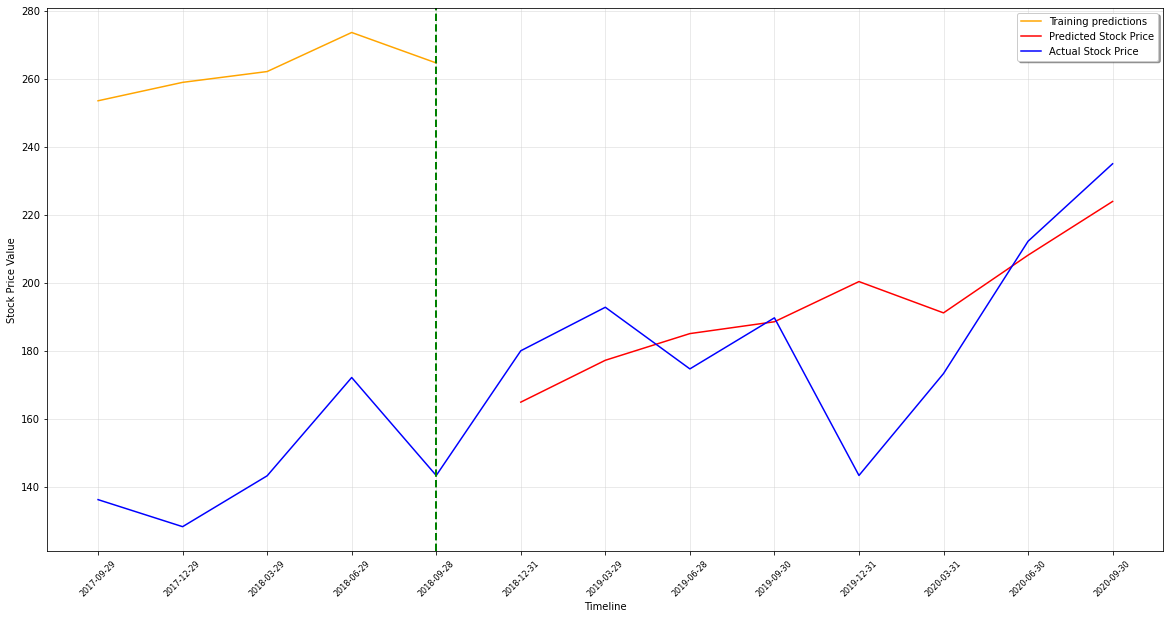

In [40]:
# Chage on attributes and no change on PricePerShare
# Reduced attributes
PRED_TRAIN = sc_predict.inverse_transform(clf2.predict(X_scaled_train))
PRED_FUTURE = sc_predict.inverse_transform(clf2.predict(X_scaled_test))
# Plot parameters
START_DATE_FOR_PLOTTING = '2017-09-29'
START_INDEX = dataNSC_train.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(dataNSC_train.index[START_INDEX:], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(dataNSC_test.index[:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(dataNSC.index[START_INDEX:], dataNSC['CloseNext'][START_INDEX:].values, color='b', label='Actual Stock Price')

plt.axvline(x = dataNSC_train.index[-1], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

#print("RMSE",mean_squared_error(dataNSC_train['CloseNext'], PRED_TRAIN, squared=False))